In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import sys

In [44]:
#threshold = sys.maxsize
threshold = 1e10
file_name_with_preprocessing = "./data/preprocessing_"+str(int(threshold))+"_results.csv"
file_name_no_processing = f"./data/no_preprocessing{int(threshold)}.csv"
plot_name = "./data/reprocessing_" + str(int(threshold)) + "_plot.png"

In [45]:
qubits_required_no_preprocessing = np.genfromtxt(file_name_no_processing,
    delimiter=',',
    skip_header=1,
    dtype='int'
                                                )
                                                
qubits_required_with_preprocessing = np.genfromtxt(file_name_with_preprocessing,
                                                    delimiter=',',
                                                    skip_header=1,
                                                    dtype='int'
                                                    )

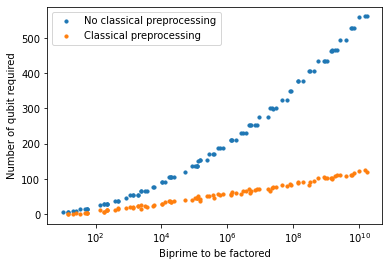

In [46]:
data_1 = np.array(qubits_required_no_preprocessing)
data_2 = np.array(qubits_required_with_preprocessing)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(data_1[:, 0], data_1[:, 1], label="No classical preprocessing", s=10)
ax.scatter(data_2[:, 0], data_2[:, 1], label="Classical preprocessing", s=10)

ax.set_xlabel("Biprime to be factored")
ax.set_ylabel("Number of qubit required")
ax.set_xscale('log')
plt.legend()
plt.savefig(plot_name)
plt.show()

In [47]:
def exp_func(x, a, b, c):
    return a * np.power(x, b) + c

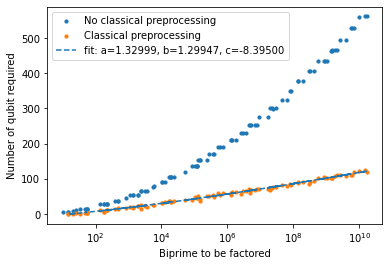

In [48]:
data_1 = np.array(qubits_required_no_preprocessing)
data_2 = np.array(qubits_required_with_preprocessing)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(data_1[:, 0], data_1[:, 1], label="No classical preprocessing", s=10)
ax.scatter(data_2[:, 0], data_2[:, 1], label="Classical preprocessing", s=10)

popt, pcov = curve_fit(exp_func, np.log2(data_2[:, 0]), data_2[:, 1])

plt.plot(data_2[:, 0], exp_func(np.log2(data_2[:, 0]), *popt), '--',
         label='fit: a=%5.5f, b=%5.5f, c=%5.5f' % tuple(popt))
         
ax.set_xlabel("Biprime to be factored")
ax.set_ylabel("Number of qubit required")
ax.set_xscale('log')
plt.legend()
plt.savefig(plot_name)
plt.show()

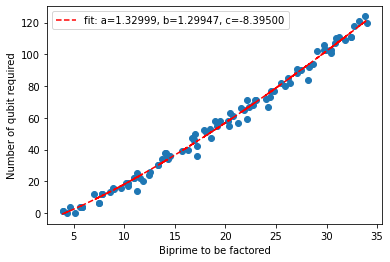

In [49]:
xdata = np.log2(data_2[:, 0])
ydata = data_2[:, 1]

popt, pcov = curve_fit(exp_func, xdata, ydata)

plt.scatter(xdata, ydata)
plt.plot(xdata, exp_func(xdata, *popt), 'r--',
         label='fit: a=%5.5f, b=%5.5f, c=%5.5f' % tuple(popt))
plt.xlabel('Biprime to be factored')
plt.ylabel('Number of qubit required')
plt.legend()
plt.show()

In [50]:
num_of_chunks = 5
xdata_split = np.array_split(xdata, num_of_chunks)
ydata_split = np.array_split(ydata, num_of_chunks)

In [51]:
partial_fit = []
for i in range(num_of_chunks):
    #print(len(xdata_split[i]) == len(ydata_split[i]))
    try:
        xdata = xdata_split[i]
        ydata = ydata_split[i]

        interval_start = 2 ** int(xdata[0])
        interval_end = 2 ** int(xdata[-1])
        popt, pcov = curve_fit(exp_func, xdata, ydata, maxfev=10000)

        a = popt[0]
        b = popt[1]
        c = popt[2]

    except:
        continue
    
    partial_fit.append([interval_start, interval_end, a, b, c])

In [52]:
for i in partial_fit:
    print(i)

[16, 512, 0.3478269760976288, 1.8079363623617195, -3.823828908986619]
[1024, 65536, 6.740642912534724, 0.8899486362079669, -36.98838166097079]
[65536, 4194304, 19941.18803174209, 0.0036857074012860637, -20105.191888779533]
[4194304, 268435456, 0.7158036283046094, 1.4262941387342667, 6.803252756439854]
[134217728, 8589934592, 1.183723457518716, 1.3239390259268051, -4.03138950139021]
